In [186]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

## Data

In [2]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths.csv"
malaria_deaths = pd.read_csv(url)

In [7]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths_age.csv"
malaria_deaths_age = pd.read_csv(url, index_col=0)

In [9]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_inc.csv"
malaria_inc = pd.read_csv(url)

In [11]:
malaria_deaths.head()

,Entity,Code,Year,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)"
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472


In [12]:
malaria_deaths_age.head()

,entity,code,year,age_group,deaths
1,Afghanistan,AFG,1990,Under 5,184.606435
2,Afghanistan,AFG,1991,Under 5,191.658193
3,Afghanistan,AFG,1992,Under 5,197.140197
4,Afghanistan,AFG,1993,Under 5,207.357753
5,Afghanistan,AFG,1994,Under 5,226.209363


In [13]:
malaria_inc.head()

,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746


## graph 1: malaria death by age

In [14]:
age_group = set(malaria_deaths_age['age_group'])

In [111]:
#get only world data
wrld_age = malaria_deaths_age[malaria_deaths_age['entity']=='World']

In [113]:
wrld_age.age_group = wrld_age.age_group.astype('category')

In [121]:
wrld_age.age_group = wrld_age.age_group.cat.reorder_categories(['Under 5', '5-14','15-49','50-69','70 or older'])

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [124]:
wrld_age = wrld_age.sort_values(by = ['age_group', 'year'])

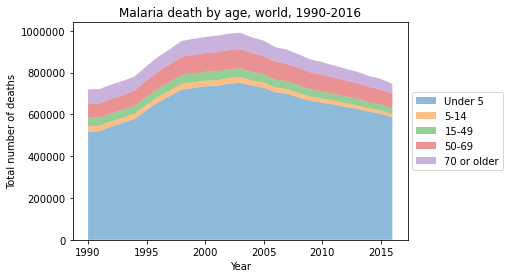

In [133]:
plt.stackplot(list(set(wrld_age_ord.year)), wrld_age_ord.deaths.values.reshape((-1,27)), 
              labels = ['Under 5', '5-14','15-49','50-69','70 or older'], alpha = 0.5)
plt.legend(loc="right", bbox_to_anchor=(1.3, 0.5))
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xlabel("Year")
plt.ylabel("Total number of deaths")
plt.title("Malaria death by age, world, 1990-2016");

## graph 2: malaria death rate: top 5 countries

In [153]:
malaria_deaths.rename(columns={"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)": 
                              "Death_rate"}, inplace = True)
top5 = malaria_deaths.groupby("Code", as_index=False)["Death_rate"].mean().sort_values(by="Death_rate", ascending=False).head(5)


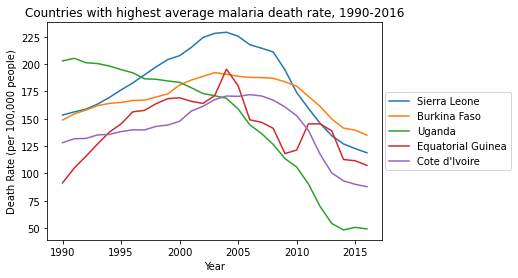

In [183]:
for code in top5.Code:
    df = malaria_deaths[malaria_deaths.Code==code]
    plt.plot(df['Year'], df['Death_rate'], label = df['Entity'].iloc[0])

plt.legend(loc="right", bbox_to_anchor=(1.4, 0.5));
plt.xlabel("Year")
plt.ylabel("Death Rate (per 100,000 people)")
plt.title("Countries with highest average malaria death rate, 1990-2016");

## graph 3: malaria incidents: top 5 countries

In [209]:
malaria_inc.rename(columns={"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)": 
                              "Incidence"}, inplace = True)

top5 = malaria_inc.groupby("Code", as_index=False)["Incidence"].mean().sort_values(by="Incidence", ascending=False).head(5)

In [210]:
df = malaria_inc[malaria_inc.Code.isin(top5.Code)]
px.bar(df, x = 'Year', y = 'Incidence', color = 'Entity', title = 'Countries with highest average malaria incidence, 2000-2015')

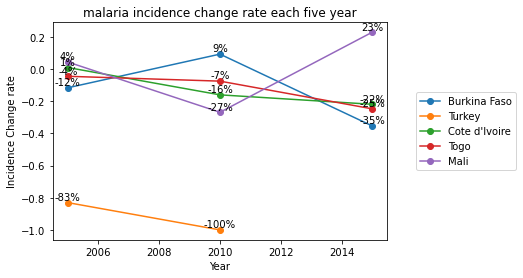

In [223]:
for code in top5.Code:
    df = malaria_inc[malaria_inc.Code==code]
    plt.plot(df['Year'], df.Incidence.pct_change(), label = df['Entity'].iloc[0], marker = 'o')
    for x,y in zip(df['Year'],df.Incidence.pct_change()):

        label = "{:.0%}".format(y)

        plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,2.5), ha='center')
plt.legend(loc="right", bbox_to_anchor=(1.4, 0.5))
plt.xlabel("Year")
plt.ylabel("Incidence Change rate")
plt.title("malaria incidence change rate each five year");